<a href="https://colab.research.google.com/github/tnrcelik/assignment/blob/main/statisticassignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
#EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

#CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
mu=13.20 
s=2.50  
alpha = 0.01
size=40

In [ ]:
# H0: mu = 13,20   #ho da populasyon parametresi olur
# H1: mu <13,20    #sol kuyrukta arayacağım .düşük istenmez yüksekse sıkıntı olmaz

In [ ]:
xbar=12.20  #yukarıda direkt ortalama mevcut

In [ ]:
s_hata = s/np.sqrt(40)  #sampleın sapmasını hesapladım
s_hata

0.3952847075210474

In [ ]:
z_test = (xbar - 13.20) / (s/np.sqrt(40))
z_test

-2.5298221281347035

In [ ]:
stats.norm.cdf(z_test)

0.005706018193000826

In [ ]:
p_value=stats.norm.cdf(12.20, loc=13.20, scale=s_hata)
p_value

0.005706018193000826

In [ ]:
#EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

#Results for two type of soils

#CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [ ]:
df=pd.read_csv("/content/soil - Sheet1.csv")  # na_values="0" da diyebilirmiyiz oratlamayı değiştirmemesi için?

In [ ]:
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [ ]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [ ]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(df["Soil1"][:30],df["Soil2"] )  
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [ ]:
df.Soil1.mean()

1.6918000000000002

In [ ]:
df.Soil2.mean()

1.4171142857142855

In [ ]:
indTest = stats.ttest_ind(df.Soil1[:30],df.Soil2 , equal_var=True)  
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [ ]:
#EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

#Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
#Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
#CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [ ]:
df=pd.read_csv("/content/2015 PISA Test - Sheet1.csv")
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [ ]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [ ]:
df.groupby("Continent_Code")["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

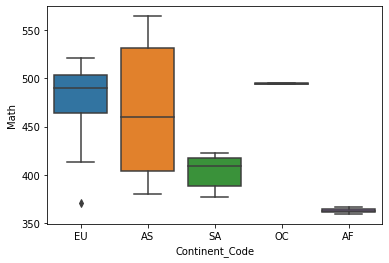

In [ ]:
sns.boxplot(x="Continent_Code", y="Math", data=df);

In [ ]:
Math_AS=df[df["Continent_Code"]=="AS"].Math
Math_AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [ ]:
df[df["Continent_Code"]=="AS"].Math.mean()

466.21664705882347

In [ ]:
df[df["Continent_Code"]=="AS"].Math.std()

64.35649013277641

In [ ]:
Math_EU=df[df["Continent_Code"]=="EU"].Math
Math_EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [ ]:
df[df["Continent_Code"]=="EU"].Math.mean()

477.98144864864867

In [ ]:
df[df["Continent_Code"]=="EU"].Math.std()

35.15040262727063

In [ ]:
df.describe(include=object)

,Country Code,Continent_Code
count,70,65
unique,70,5
top,ALB,EU
freq,1,37


In [ ]:
leveneTest = stats.levene(Math_EU,Math_AS )
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [ ]:
indTest = stats.ttest_ind(Math_EU,Math_AS, equal_var=True)   
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [ ]:
#EXERCISE 4.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

#CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [ ]:
df = pd.read_csv('/content/weight - Sheet1.csv')
df.head()

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83


In [ ]:
#H0: dbar = 0

#H1: dbar > 0

In [ ]:
depTest = stats.ttest_rel(df["starting"], df["ending"], alternative="greater") # a-b, beware the order
depTest

In [ ]:
alpha = 0.01

if depTest.pvalue < alpha:
    print("reject the null")
else:
    print("fail to reject to null")